In [1]:
from MR_env_ddpg import MR_env as Environment
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import copy
from datetime import datetime
import scipy.linalg as linalg 
import random
import pdb
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.animation import FuncAnimation, PillowWriter
import DDPG_new as DDPG

In [2]:
I= np.load('I.npy')
I

array([[ 0.      , -9.398096, -9.434898, ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [10]:
S_gru = torch.ones(1, 10, 512)
S_gru

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [14]:
I_gru = torch.zeros(1, 10, 512)
I = I_gru[:,:1,:]
I.shape

torch.Size([1, 1, 512])

In [33]:
II = torch.randn(1, 1, 512)
II.shape

torch.Size([1, 1, 512])

: 

In [30]:
concatenated_tensor = torch.cat((I, S_gru), dim=1)
concatenated_tensor[:, 1:,:].shape

torch.Size([1, 10, 512])

In [1]:
import torch

import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(1, batch_size, self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Example usage
input_size = 512
hidden_size = 256
output_size = 1

model = GRUModel(input_size, hidden_size, output_size)
inputs = torch.randn(1, 10, input_size)  # Assuming batch size of 1
output = model(inputs)
print(output)

tensor([[0.0479]], grad_fn=<AddmmBackward0>)


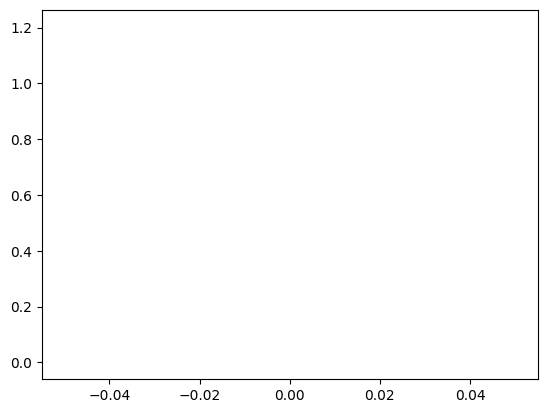

In [5]:
i = np.load('I.npy')
plt.plot(i);